In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

In [19]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

data = ContinuousIV.run_rolling_b_X_Y_simulations(
    b_range=(-5, 5), N_points=100, replications=1, n=500,
    # allowed_functions=['identity']
)
data

,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean
0,222932,0.674162,-0.766022,-5.00000,-1.696768,0.312265,0.084694,0.333427,0.359328,exp_neg_sq,sin,probit,exp_neg_sq,-0.739153,0.000,8.404499e-06,0.739161,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[-0.6960634301220203, 0.08107145212414438, -0....","[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0.45132544068227637, 0.952079465811768, 1.120...",0.999989,3.834549e-20,1,0,0.330,0.491311
1,823591,-1.092675,0.055773,-4.89899,-0.275068,0.615746,1.665338,0.207399,0.143399,identity,sigmoid,probit,cos,-0.763047,0.000,2.148100e-01,0.977857,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...","[-0.043580438548851096, 0.10541239252578055, -...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.9882589423271865, 0.9916424631870001, 0.229...",1.000000,0.000000e+00,1,0,0.384,0.710352
2,882331,-1.098709,0.593546,-4.79798,0.289459,0.451102,0.414665,0.182822,1.763500,log1p_abs,tanh,probit,rescaled_identity,-0.133299,0.000,0.000000e+00,0.133299,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, ...","[-0.8807472799789343, -0.7545661363260981, -3....","[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, ...","[0.004817448503054451, 0.0, 0.1873031290920777...",0.391828,0.000000e+00,1,0,0.508,0.046575
3,198865,0.669634,0.249828,-4.69697,0.503804,0.726679,2.323495,0.247689,0.493046,exp_clipped,exp_neg_sq,sigmoid,rescaled_identity,-0.099340,0.000,0.000000e+00,0.099340,"[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...","[-0.2040262575743323, 0.9210120448809372, -0.5...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, ...","[0.14431303266538562, 0.09035227111484212, 0.0...",0.566819,0.000000e+00,1,0,0.616,0.101901
4,448280,-0.339032,0.556368,-4.59596,-1.201392,0.502625,1.247269,1.292739,0.473671,identity,log1p_abs,tanh_scaled,sine_sym,0.035904,0.406,3.279089e-01,0.292005,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...","[-0.022276021394676264, -0.10743909908038458, ...","[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[0.36610040810040184, 0.0, 0.9465038677452338,...",0.999998,0.000000e+00,1,0,0.436,0.321899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,839230,-1.224187,0.690812,4.59596,1.465185,0.991975,0.505372,2.092544,2.604228,identity,tanh,sigmoid,bounded_linear,0.413407,0.754,6.961172e-01,0.282710,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.7963795732290193, 1.3424901076608344, -0.9...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...","[0.0, 1.0, 0.024112659237734667, 1.0, 0.133357...",1.000000,0.000000e+00,1,0,0.326,0.394963
96,579046,0.628539,1.141629,4.69697,-0.051509,0.521312,0.549594,0.213569,1.123184,exp_clipped,bounded_linear,probit,sine_sym,0.422748,0.756,6.479584e-01,0.225210,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[-2.924591804800223, -1.4998622869640468, 0.16...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[0.9359593444416154, 0.7052090173504773, 0.652...",0.999971,0.000000e+00,1,0,0.876,0.613848
97,170449,-1.481152,0.154780,4.79798,-0.319582,0.710405,1.178638,0.982859,3.040218,bounded_linear,log1p_abs,softplus,zero_centered_tanh,0.684140,1.000,9.975645e-01,0.313425,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[-0.3336612559770738, 1.9803419079141167, -1.0...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.7316410648572789, 0.34704412...",0.999997,0.000000e+00,1,0,0.260,0.401920
98,426737,0.942187,0.114785,4.89899,0.185479,0.201045,0.963533,1.093137,0.399634,sine_sym,cos,tanh_scaled,rescaled_identity,0.603900,0.996,8.205411e-01,0.216641,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[-0.09765203768319239, 0.5879086723549388, -0....","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0.8335515525786467, 0.8365129188695523, 0.798...",0.883407,0.000000e+00,1,0,0.564,0.569111


In [20]:
contIV = ContinuousIV('IV Dag', data, 1)
contIV.run_all_bounding_algorithms()
data

Running ATE_zhangbareinboim...
ATE_zhangbareinboim completed in 21.28 seconds.
Total runtime: 21.28 seconds.


,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean,ATE_zhangbareinboim_bound_lower,ATE_zhangbareinboim_bound_upper,ATE_zhangbareinboim_bound_valid,ATE_zhangbareinboim_bound_width,ATE_zhangbareinboim_bound_failed
0,222932,0.674162,-0.766022,-5.00000,-1.696768,0.312265,0.084694,0.333427,0.359328,exp_neg_sq,sin,probit,exp_neg_sq,-0.739153,0.000,8.404499e-06,0.739161,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[-0.6960634301220203, 0.08107145212414438, -0....","[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0.45132544068227637, 0.952079465811768, 1.120...",0.999989,3.834549e-20,1,0,0.330,0.491311,-0.797265,-0.084602,True,0.712663,False
1,823591,-1.092675,0.055773,-4.89899,-0.275068,0.615746,1.665338,0.207399,0.143399,identity,sigmoid,probit,cos,-0.763047,0.000,2.148100e-01,0.977857,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, ...","[-0.043580438548851096, 0.10541239252578055, -...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.9882589423271865, 0.9916424631870001, 0.229...",1.000000,0.000000e+00,1,0,0.384,0.710352,-0.829153,-0.042285,True,0.786868,False
2,882331,-1.098709,0.593546,-4.79798,0.289459,0.451102,0.414665,0.182822,1.763500,log1p_abs,tanh,probit,rescaled_identity,-0.133299,0.000,0.000000e+00,0.133299,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, ...","[-0.8807472799789343, -0.7545661363260981, -3....","[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, ...","[0.004817448503054451, 0.0, 0.1873031290920777...",0.391828,0.000000e+00,1,0,0.508,0.046575,-0.361779,0.254919,True,0.616698,False
3,198865,0.669634,0.249828,-4.69697,0.503804,0.726679,2.323495,0.247689,0.493046,exp_clipped,exp_neg_sq,sigmoid,rescaled_identity,-0.099340,0.000,0.000000e+00,0.099340,"[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...","[-0.2040262575743323, 0.9210120448809372, -0.5...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, ...","[0.14431303266538562, 0.09035227111484212, 0.0...",0.566819,0.000000e+00,1,0,0.616,0.101901,-0.686100,0.243424,True,0.929524,False
4,448280,-0.339032,0.556368,-4.59596,-1.201392,0.502625,1.247269,1.292739,0.473671,identity,log1p_abs,tanh_scaled,sine_sym,0.035904,0.406,3.279089e-01,0.292005,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...","[-0.022276021394676264, -0.10743909908038458, ...","[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[0.36610040810040184, 0.0, 0.9465038677452338,...",0.999998,0.000000e+00,1,0,0.436,0.321899,-0.419197,0.469089,True,0.888286,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,839230,-1.224187,0.690812,4.59596,1.465185,0.991975,0.505372,2.092544,2.604228,identity,tanh,sigmoid,bounded_linear,0.413407,0.754,6.961172e-01,0.282710,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.7963795732290193, 1.3424901076608344, -0.9...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...","[0.0, 1.0, 0.024112659237734667, 1.0, 0.133357...",1.000000,0.000000e+00,1,0,0.326,0.394963,0.038514,0.848661,True,0.810148,False
96,579046,0.628539,1.141629,4.69697,-0.051509,0.521312,0.549594,0.213569,1.123184,exp_clipped,bounded_linear,probit,sine_sym,0.422748,0.756,6.479584e-01,0.225210,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[-2.924591804800223, -1.4998622869640468, 0.16...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[0.9359593444416154, 0.7052090173504773, 0.652...",0.999971,0.000000e+00,1,0,0.876,0.613848,-0.278859,0.647939,True,0.926798,False
97,170449,-1.481152,0.154780,4.79798,-0.319582,0.710405,1.178638,0.982859,3.040218,bounded_linear,log1p_abs,softplus,zero_centered_tanh,0.684140,1.000,9.975645e-01,0.313425,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[-0.3336612559770738, 1.9803419079141167, -1.0...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.7316410648572789, 0.34704412...",0.999997,0.000000e+00,1,0,0.260,0

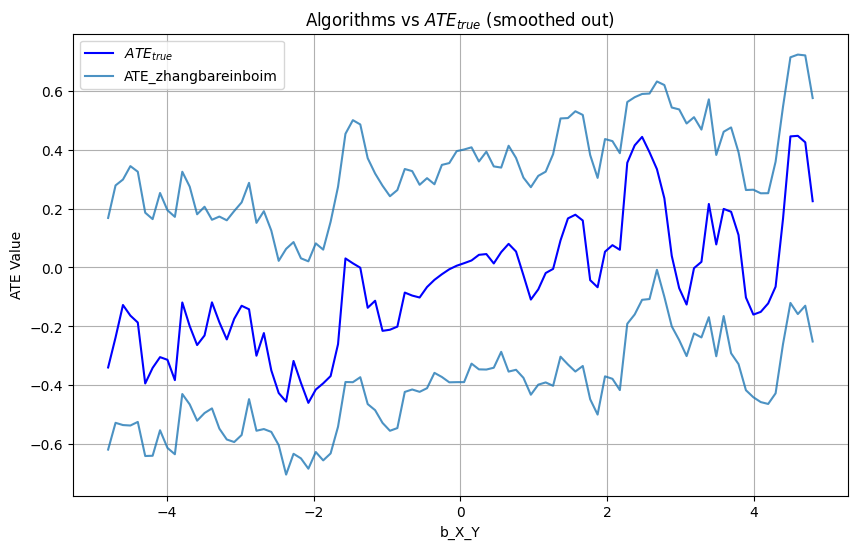

In [22]:
PlottingUtil.plot_smoothed_query_vs_bounds(contIV.data, 'ATE', ['ATE_zhangbareinboim'], 5)

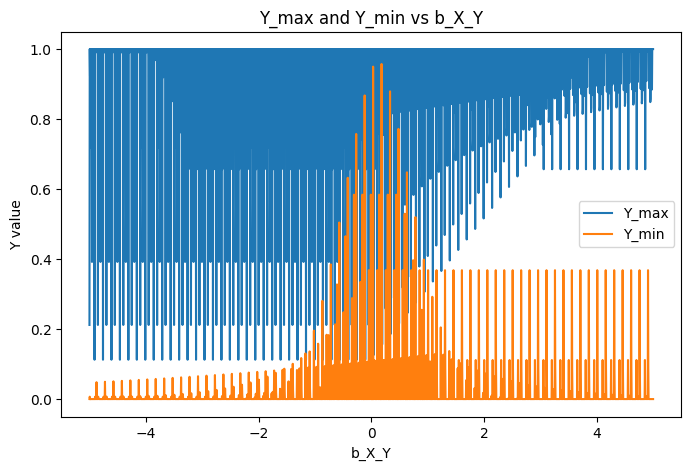

In [107]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

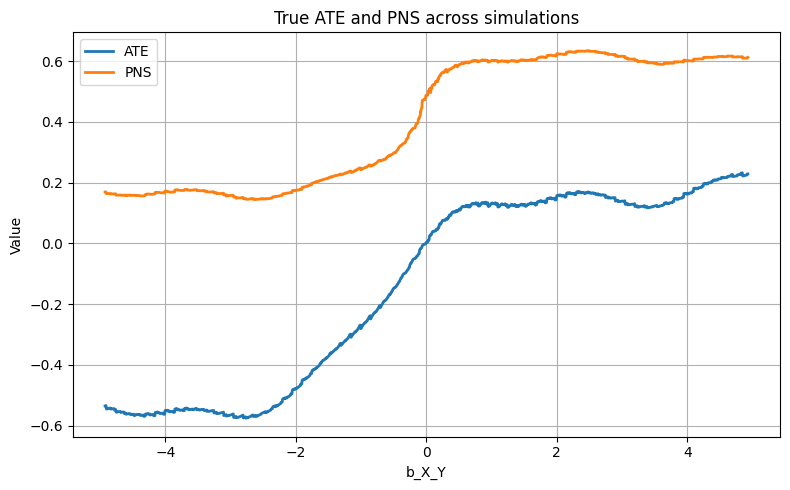

In [105]:
PlottingUtil.plot_ate_pns(data, window=30)

In [4]:
binaryIV = BinaryIV('IV Dag', data)

algorithms = [alg for alg in binaryIV.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run_all_bounding_algorithms(algorithms)

Running ATE_2SLS-0.99...
ATE_2SLS-0.99 completed in 0.19 seconds.
Running ATE_2SLS-0.98...
ATE_2SLS-0.98 completed in 0.25 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 6.28 seconds.
Running ATE_autobound...
ATE_autobound completed in 4.71 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.59 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.59 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.63 seconds.
Running ATE_nonpara...
ATE_nonpara completed in 0.01 seconds.
Total runtime: 13.26 seconds.


             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width
           PNS_nonpara          0.00            16.00          0.1784
       PNS_causaloptim          4.00             9.38          0.4198
         PNS_autobound          1.00             0.00          0.4283
PNS_entropybounds-0.10          0.00             0.00          0.5021
PNS_entropybounds-0.20          0.00             0.00          0.5752
PNS_entropybounds-0.80          0.00             0.00          0.7197
    PNS_zaffalonbounds           N/A              N/A             N/A


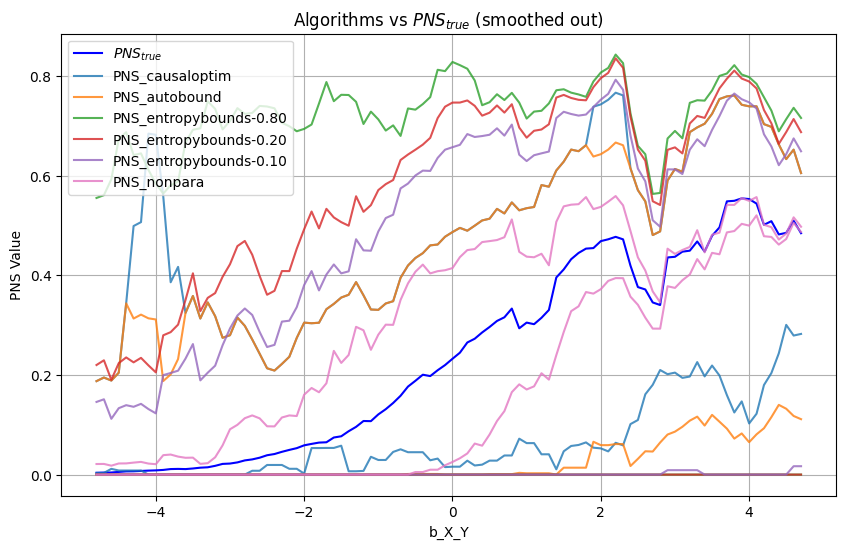

In [28]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('PNS')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, ate_algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'PNS', ate_algs, 5, False)